In [5]:
# %matplotlib notebook

import os
import io
import sys
import matplotlib.pyplot as plt
import datetime
from tqdm import tqdm
import PIL

prj_dir = os.path.abspath(os.getcwd() + '/..')
print(prj_dir)
sys.path.append(prj_dir)

/Users/raul.sanchez/data_scientia/rulo_mota_omath


In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import shap
from sklearn.model_selection import train_test_split

from src import config
from src.features import X_features
from src.features import banxico_mun_income_remittances

In [7]:
path = os.path.join(
    config.PRJ_DIR,
    'data/processed/X.csv')

data = pd.read_csv(path)
data.set_index('id', inplace=True)

remittances = banxico_mun_income_remittances.get()

In [8]:
data.rename(columns={
    'captacion__cuentas_transaccionales_tradicionales': 'captacion_cnts_transacc_trad',
    'captacion__depositos_a_plazo': 'captacion_depositos_plazo',
    'numero_de_puntos_de_acceso__total_sucursales': 'num_ptos_acceso_tot_sucursales',
    'indicadores_demograficos_(puntos_de_acceso_por_cada_10000_adultos)__sucursales_banca_comercial': 'pntos_acceso_sucursales_banca_com',
    'credito__nomina (2)': 'credito_nomina',
    'credito__hipotecario (2)': 'credito_hipotecario',
    'credito__automotriz (2)': 'credito_automotriz',
    'numero_de_puntos_de_acceso__contratos_que_utilizan_banca_movil_delta': 'num_ptos_acceso_contratos_banca_movil_delta',
    'credito__tarjetas_de_credito': 'tarjetas_de_credito',
    'socios_-_socap__mujeres': 'socios_socap_mujeres',
    'credito__abcd_delta': 'credito_abcd_delta',
    'transacciones__en_cajeros_automaticos_delta.1': 'trans_cajeros_aut_delta.1',
    'captacion__cuentas_transaccionales_tradicionales (2)': 'captacion_ctas_trans_tradicionales',
    'socios_-_socap__hombres': 'socios_socap_hombres',
    'socios_-_socap__mujeres_delta': 'socios_socap_mujeres_delta',
}, inplace=True)

# data.drop('captacion_cnts_transacc_trad', axis=1)

In [14]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.colors as mcolors
import matplotlib.colors as mc
import colorsys

def get_colors(col, cmap='seismic', format='hex'):
    """
    Given a pd.Series with numeric values, it assigns a
    color for each value in function of the scale of the
    value itself.

    Parameters
    -----------
    col : pd.Series
        Feature where to define colors

    Return
    ------
    colors : dict
        dictonary of (num_value, color) of
        colors from the color map cmap
    """

    cmap = plt.get_cmap(cmap)

    unique_values = col.drop_duplicates().sort_values()

    val_min = unique_values.min()
    val_max = unique_values.max()

    unique_values_norm = (unique_values - val_min) / (val_max - val_min)

    colors = cmap(unique_values_norm)

    if format == 'hex':
        colors = [rgb2hex(x) for x in colors]

    colors = dict(
        (val, colors[val_it])
        for val_it, val in enumerate(unique_values))

    return colors


def log_labels_to_normal(labels):
    """
    """

    new_labels = []
    for l in labels:
        try:
            new_labels.append(
                int(np.expm1(float(l))))
        except Exception as e:
             new_labels.append(l)

    return new_labels

In [35]:
mun_ids = list(set(data.index).intersection(remittances.index))

data = data.loc[mun_ids]
remittances = remittances.loc[mun_ids]

In [36]:
remittance_amount = remittances['Remittance Amount'].clip(
    remittances['Remittance Amount'].quantile(.05), 
    remittances['Remittance Amount'].quantile(.95))

remittance_color_mapping = get_colors(remittance_amount, cmap='cool')
remittance_amount_color = remittance_amount.apply(lambda x: remittance_color_mapping[x])
remittance_amount_color = remittance_amount_color.loc[data.index]

In [37]:
# import inspect
# lines = inspect.getsource(get_scatter_plot)
# print(lines)

In [89]:
def get_scatter_plot(x_f, y_f):
    """
    """
    x = data[x_f].apply(np.log1p)
    y = data[y_f].apply(np.log1p)

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    ax.scatter(
        x, 
        y,
        alpha=.5,
        c=remittance_amount_color)

    ax.set_xlabel(x_f, fontsize=20)
    ax.set_ylabel(y_f, fontsize=20)
    ax.grid()
    
    return fig, ax

def get_plot_normal_scale(ax):
    ax.set_yticklabels(log_labels_to_normal([
        item.get_text() 
        for item in ax.get_yticklabels()
    ]))

    ax.set_xticklabels(log_labels_to_normal([
        item.get_text() 
        for item in ax.get_xticklabels()
    ]), fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)

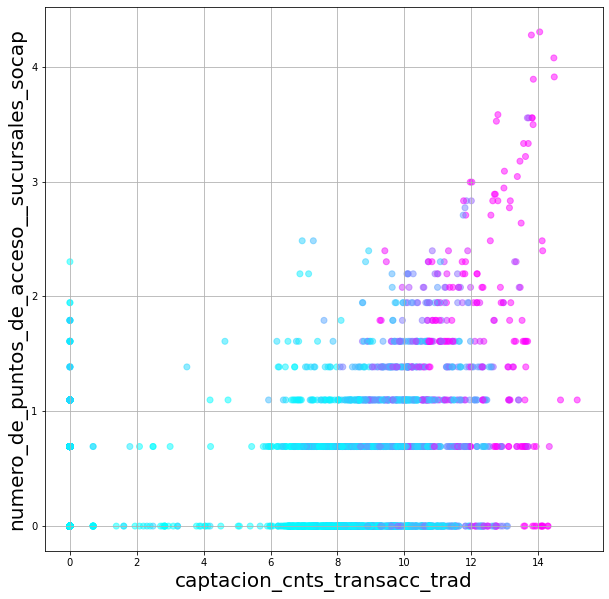

In [90]:
x_f = 'captacion_cnts_transacc_trad'
y_f = 'numero_de_puntos_de_acceso__sucursales_socap'
 
fig, ax = get_scatter_plot(x_f, y_f)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


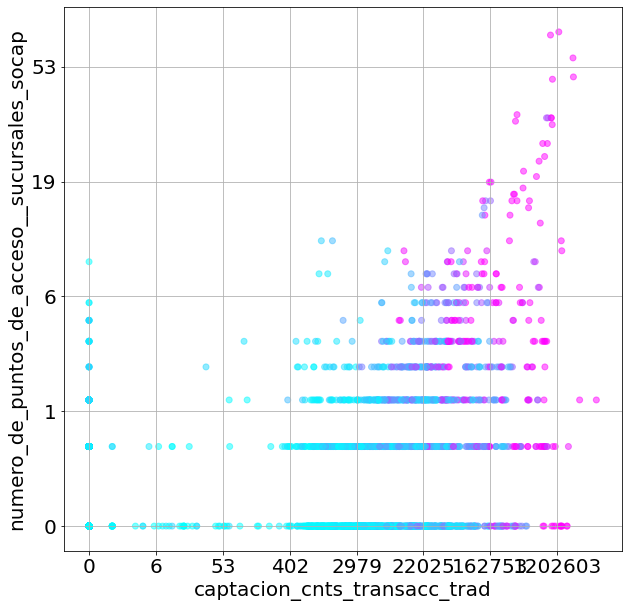

In [91]:
get_plot_normal_scale(ax)
fig

# Tarjetas de credito

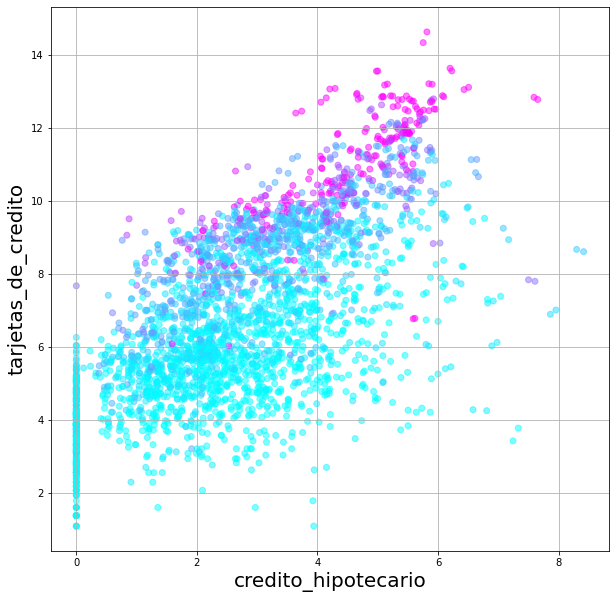

In [92]:
x_f = 'credito_hipotecario'
y_f = 'tarjetas_de_credito'

fig, ax = get_scatter_plot(x_f, y_f)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


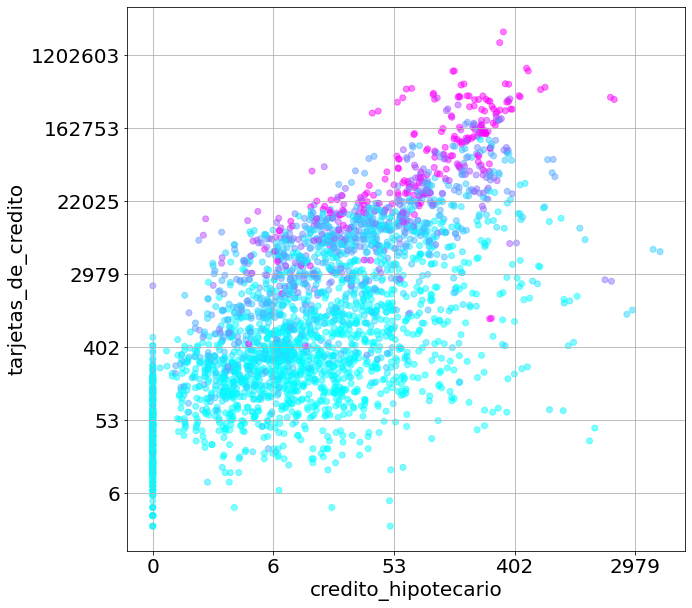

In [93]:
get_plot_normal_scale(ax)
fig

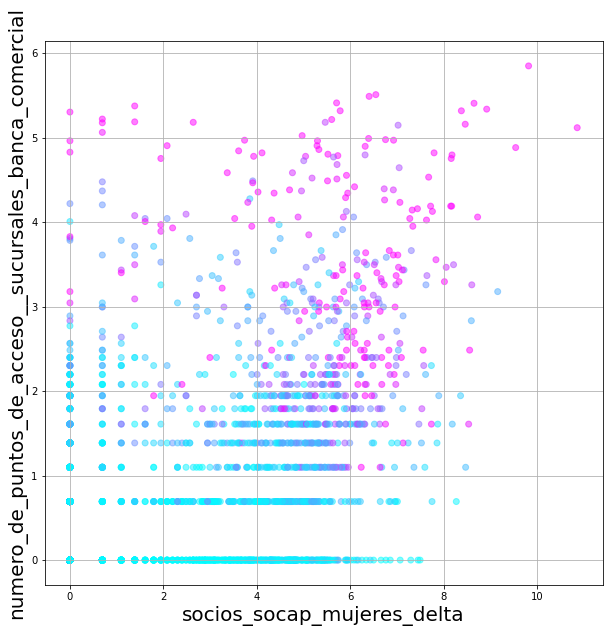

In [94]:
x_f = 'socios_socap_mujeres_delta'
y_f = 'numero_de_puntos_de_acceso__sucursales_banca_comercial'

fig, ax = get_scatter_plot(x_f, y_f)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


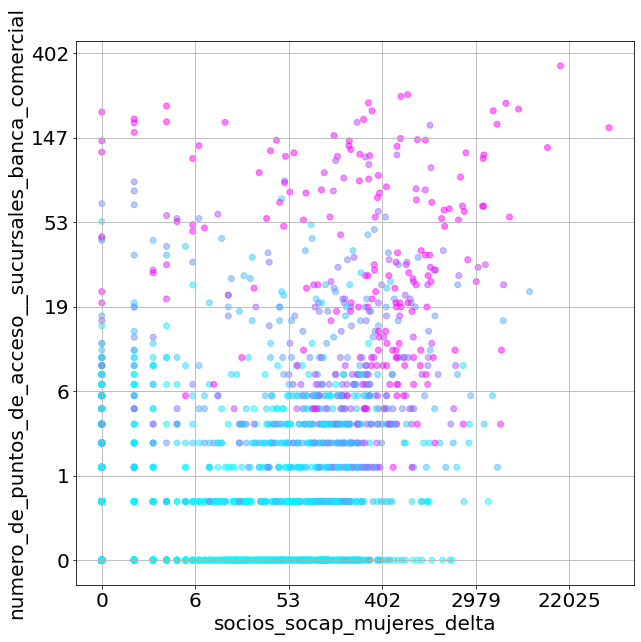

In [95]:
get_plot_normal_scale(ax)
fig

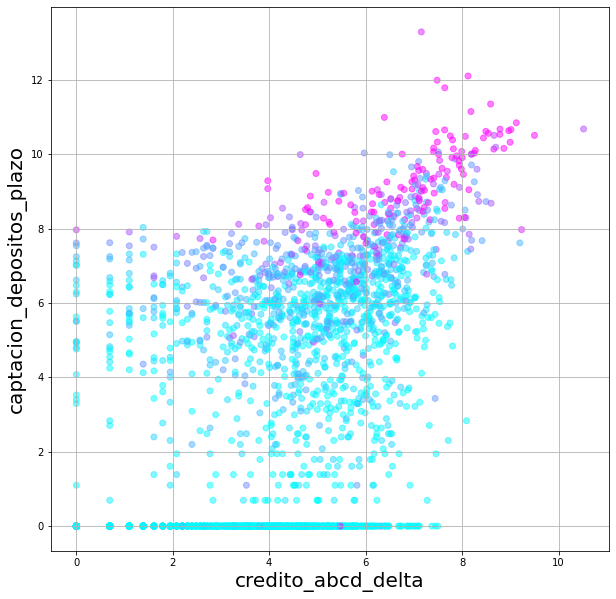

In [96]:
x_f = 'credito_abcd_delta'
y_f = 'captacion_depositos_plazo'

fig, ax = get_scatter_plot(x_f, y_f)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


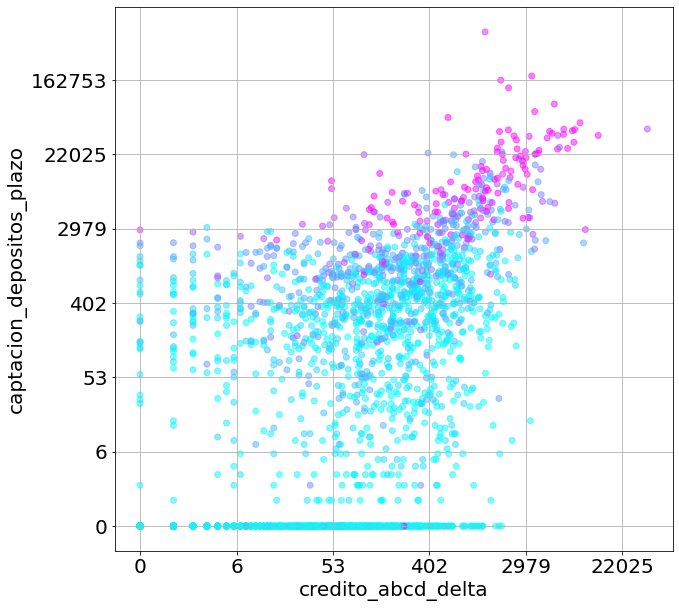

In [79]:
get_plot_normal_scale(ax)
fig